# 0.3.2 Métricas básicas de clasificación

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, balanced_accuracy_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import get_scorer

pd.set_option("display.notebook_repr_html", False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.3.2.1 Componentes de la matriz de confusión

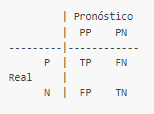

 P - Positive                 TP - Verdadero positivo (correcto)
 N - Negative                 TN - Verdadero negativo (correcto)
PP - Predicted Positive       FN - Falso negativo (mal clasificado)
PN - Predicted Negative       FP - Falso positivo (mal clasificado)

In [5]:
y_true = [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
y_pred = [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

pd.DataFrame(
    confusion_matrix(
        y_true=y_true,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=[
        "PP={}".format(sum(y_pred)),
        "PN={}".format(len(y_pred) - sum(y_pred)),
    ],
    index=[
        "P={}".format(sum(y_true)),
        "N={}".format(len(y_true) - sum(y_true)),
    ],
)

      PP=2  PN=13
P=4      1      3
N=11     1     10

## 0.3.2.2 Accuracy Classification Score

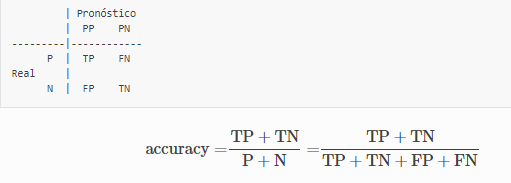

In [7]:
accuracy_score(
    # -------------------------------------------------------------------------
    # Ground truth (correct) labels.
    y_true=y_true,
    # -------------------------------------------------------------------------
    # Predicted labels, as returned by a classifier.
    y_pred=y_pred,
    # -------------------------------------------------------------------------
    # If False, return the number of correctly classified samples. Otherwise,
    # return the fraction of correctly classified samples.
    normalize=True,
)

0.7333333333333333

In [14]:
accuracy = get_scorer("accuracy")
accuracy._score_func(y_true, y_pred)

0.7333333333333333

In [8]:
accuracy_score(
    y_true=y_true,
    y_pred=y_pred,
    normalize=False,
)

11

## 0.3.2.3 True Positive Rate / recall_score

Es el porcentaje de casos pronosticados como positivos del total de casos realmente positivos. También se interpreta como la habilidad del clasificador para encontrar todos los casos relevantes.

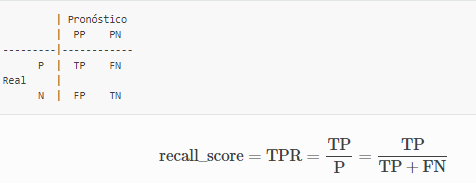

In [15]:
recall_score(y_true, y_pred)

0.25

In [16]:
recall = get_scorer("recall")
recall._score_func(y_true, y_pred)

0.25

## 0.3.2.4 True Negative Rate

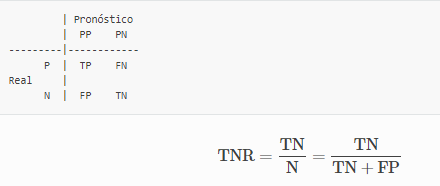

## 0.3.2.5 Precision Score

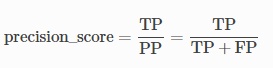

In [19]:
precision_score(y_true, y_pred)

0.5

In [20]:
precision = get_scorer("precision")
precision._score_func(y_true, y_pred)

0.5

## 0.3.2.6 Balanced Accuracy Score

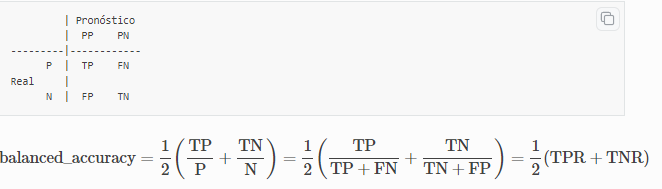

In [23]:
display(
    accuracy_score(
        y_true=y_true,
        y_pred=y_pred,
        normalize=True,
    ),
    balanced_accuracy_score(
        y_true,
        y_pred,
    ),
)

0.7333333333333333

0.5795454545454546

## 0.3.2.7 F1 Score

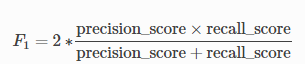

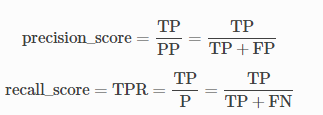

In [27]:
f1_score(y_true, y_pred)

0.3333333333333333

## 0.3.2.8 F-beta Score

Es la media armónica ponderada entre la precisión y la sensibilidad, la cual toma valores entre 0 (peor) y 1 (mejor). Para β < 1 favorece la precisión, mientras que para β > 1 favorece la sensibilidad.

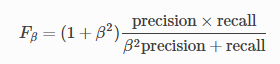

In [29]:
display(
    fbeta_score(y_true, y_pred, beta=0.5),
    fbeta_score(y_true, y_pred, beta=1.2),
)

0.4166666666666667

0.31443298969072164

## 0.3.2.9 Classification report

In [31]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.50      0.25      0.33         4

    accuracy                           0.73        15
   macro avg       0.63      0.58      0.58        15
weighted avg       0.70      0.73      0.70        15



In [14]:
print('ok_')

ok_
